In [1]:
# import packages
import cv2
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os
import numpy as np
import matplotlib.pyplot as plt

# for confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Initialize ImageDataGenerator for training data with rescaling
train_data_generator = ImageDataGenerator(rescale=1./255)

# Initialize ImageDataGenerator for validation data with rescaling
validation_data_generator = ImageDataGenerator(rescale=1./255)

In [3]:
# Generate batches of data from the training directory
train_generator = train_data_generator.flow_from_directory(
        "D:\\last_face_model_5\\data\\train", # path to the training data directory
        target_size=(48, 48), # target size of the images
        batch_size=64, # batch size for training
        color_mode="grayscale", # grayscale color mode for the images
        class_mode='categorical') # class mode for the labels

Found 121677 images belonging to 7 classes.


In [4]:
# Generate batches of data from the validation directory
validation_generator = validation_data_generator.flow_from_directory(
        'D:\\last_face_model_5\\data\\test', # path to the validation data directory
        target_size=(48, 48), # target size of the images
        batch_size=64, # batch size for validation
        color_mode="grayscale", # grayscale color mode for the images
        class_mode='categorical') # class mode for the labels

Found 24533 images belonging to 7 classes.


In [5]:
# Create a sequential model structure
model = Sequential()

# Add a 2D Convolutional layer with 32 filters, a kernel size of (3, 3), ReLU activation and input shape of (48, 48, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))

# Add another 2D Convolutional layer with 64 filters, a kernel size of (3, 3), and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a Max Pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Dropout layer to avoid overfitting, with a rate of 0.25
model.add(Dropout(0.25))

# Add two more Convolutional layers and Max Pooling layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add a Flatten layer to flatten all the values
model.add(Flatten())

# Add a dense layer with 1024 units and ReLU activation
model.add(Dense(1024, activation='relu'))

# Add another Dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a final dense layer with 7 units and softmax activation for the 7 categories (7 emotions)
model.add(Dense(7, activation='softmax'))

# Disable OpenCL to avoid any compatibility issues
cv2.ocl.setUseOpenCL(False)

# Compile the model with categorical crossentropy loss, Adam optimizer with learning rate of 0.0001 and decay of 1e-6, and accuracy as the metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# Train the model
# fit_generator is used to train the model on image data generated by the ImageDataGenerator
model_information = model.fit_generator(
        # the generator to use for training data
        train_generator,
        # number of steps (batches of samples) to yield from the generator before declaring one epoch finished and starting the next epoch
        steps_per_epoch=28709 // 64,
        # number of epochs to train the model
        epochs=50,
        # generator for validation data
        validation_data=validation_generator,
        # number of steps (batches of samples) to yield from the validation generator
        validation_steps=7178 // 64)

C:\Users\Rashada\AppData\Local\Temp\ipykernel_7932\3507179809.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_information = model.fit_generator(


Epoch 1/50
448/448 [==============================] - 349s 776ms/step - loss: 1.7143 - accuracy: 0.3295 - val_loss: 1.6823 - val_accuracy: 0.3396
Epoch 2/50
448/448 [==============================] - 294s 656ms/step - loss: 1.5573 - accuracy: 0.4187 - val_loss: 1.5516 - val_accuracy: 0.4128
Epoch 3/50
448/448 [==============================] - 252s 562ms/step - loss: 1.4419 - accuracy: 0.4748 - val_loss: 1.5086 - val_accuracy: 0.4346
Epoch 4/50
448/448 [==============================] - 220s 491ms/step - loss: 1.3884 - accuracy: 0.4959 - val_loss: 1.4687 - val_accuracy: 0.4520
Epoch 5/50
448/448 [==============================] - 198s 443ms/step - loss: 1.3449 - accuracy: 0.5144 - val_loss: 1.4621 - val_accuracy: 0.4619
Epoch 6/50
448/448 [==============================] - 182s 405ms/step - loss: 1.3080 - accuracy: 0.5287 - val_loss: 1.4272 - val_accuracy: 0.4735
Epoch 7/50
448/448 [==============================] - 172s 385ms/step - loss: 1.2805 - accuracy: 0.5384 - val_loss: 1.3862 -

In [7]:
# Get the predictions for the validation set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the validation set
y_true = validation_generator.classes

384/384 [==============================] - 26s 67ms/step


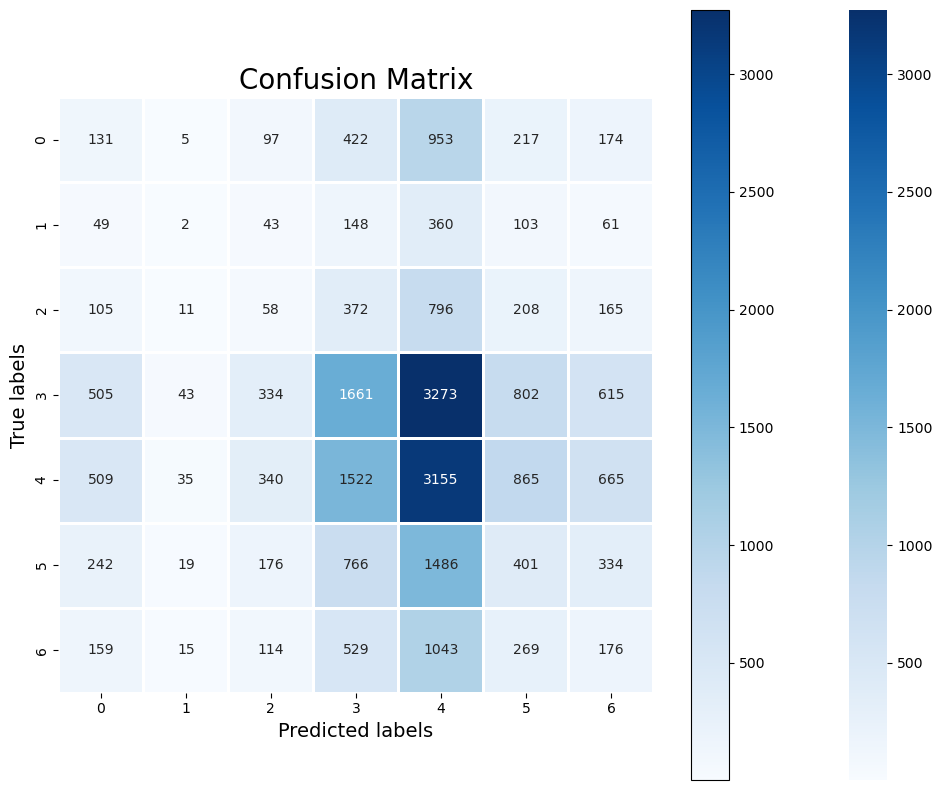

In [8]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
conf_matrix = confusion_matrix(y_true,y_pred)
plt.figure(figsize = (12,10))

sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1,
           annot=True,
           fmt='')

# Plotting the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

plt.title('Confusion Matrix', size=20)
plt.xlabel("Predicted labels", size=14)
plt.ylabel("True labels", size=14)

plt.show()